In [1]:
import pandas as pd
import numpy as np
import wrangle
import matplotlib.pyplot as plt
from pydataset import data
import regression_project.wrangle as w
import regression_project.explore as ex

# modeling methods
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = data('swiss')

In [3]:
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [4]:
target = 'Fertility'

In [5]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = w.train_validate_test_split(df,target,42)

# Baseline
## About the initial baseline:

Before we begin making models, we need to know how well we can estimate (predict) the Fertility (Fertility) without using any features. This is often done by predicting every observation's target value to be the mean or the median. E.g. we could predict every student's Fertility to be the mean Fertility of all the students in our training sample. We will try both the mean and the median, see which performs best, and set that evaluation metric value as our baseline performance to beat.

1. Predict all Fertility to be 10.52, which is equal to the mean of Fertility for the training sample. Store in y_train['Fertility_pred_mean'].

2. Predict all Fertility to be 11, which is equal to the median of Fertility for the training sample. Store in y_train['Fertility_pred_median'].

3. Compute the RMSE comparing actual Fertility (Fertility) to Fertility_pred_mean.

4. Compute the RMSE comparing actual Fertility (Fertility) to Fertility_pred_median.

In [6]:
# Make y_train and y_validate into dataframes
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [7]:
# 1. Predict Fertility_pred_mean
Fertility_pred_mean = y_train.Fertility.mean()
y_train['Fertility_pred_mean'] = Fertility_pred_mean
y_validate['Fertility_pred_mean'] = Fertility_pred_mean

# 2. compute Fertility_pred_median
Fertility_pred_median = y_train.Fertility.median()
y_train['Fertility_pred_median'] = Fertility_pred_median
y_validate['Fertility_pred_median'] = Fertility_pred_median

# 3. RMSE of Fertility_pred_mean
rmse_train = mean_squared_error(y_train.Fertility, y_train.Fertility_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.Fertility, y_validate.Fertility_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of Fertility_pred_median
rmse_train = mean_squared_error(y_train.Fertility, y_train.Fertility_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.Fertility, y_validate.Fertility_pred_median)**(1/2)

print("\nRMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  13.79 
Validate/Out-of-Sample:  12.73

RMSE using Median
Train/In-Sample:  13.8 
Validate/Out-of-Sample:  12.95


In [8]:
y_train.head()

,Fertility,Fertility_pred_mean,Fertility_pred_median
Herens,77.3,72.348,72.7
Glane,92.4,72.348,72.7
Sarine,82.9,72.348,72.7
Monthey,79.4,72.348,72.7
Gruyere,82.4,72.348,72.7


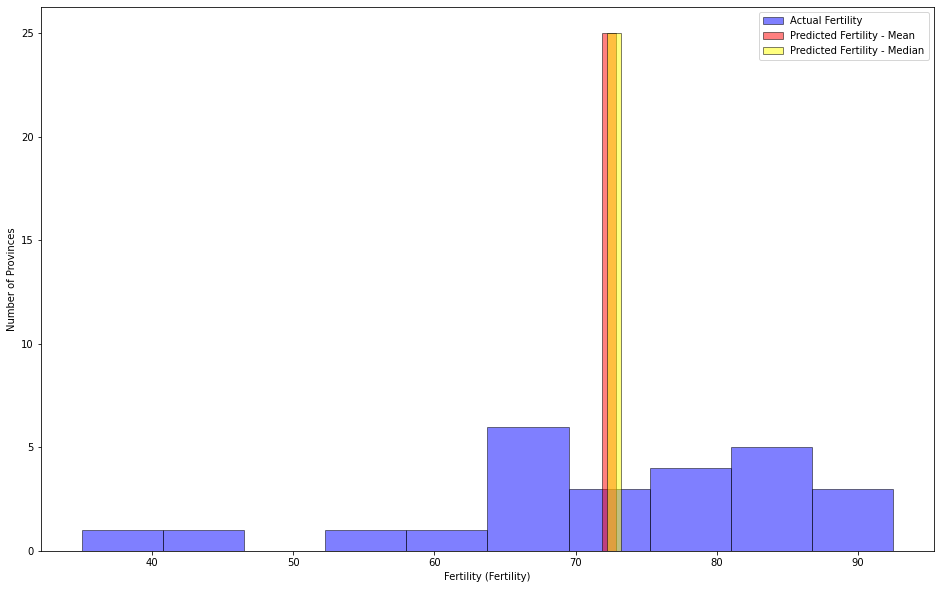

In [9]:
# plot to vihistize actual vs predicted. 
plt.figure(figsize=(16, 10))

plt.hist(y_train.Fertility, color='blue', alpha=.5, label="Actual Fertility", ec='black')
plt.hist(y_train.Fertility_pred_mean, bins=1, color='red', alpha=.5, rwidth=100, label="Predicted Fertility - Mean", ec='black')
plt.hist(y_train.Fertility_pred_median, bins=1, color='yellow', alpha=.5, label="Predicted Fertility - Median", ec='black')
plt.xlabel("Fertility (Fertility)")
plt.ylabel("Number of Provinces")

plt.legend()
plt.show()

# LinearRegression (OLS)
Fit the model using X_train_scaled and the labels from y_train.

Predict Fertility for students in training sample using our model (lm).

Evaluate using RMSE

Repeat predictions and evaluation for validation.

Compare RMSE train vs. validation. Overfitting?

In [10]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.Fertility)

# predict train
y_train['Fertility_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.Fertility, y_train.Fertility_pred_lm)**1/2

# predict validate
y_validate['Fertility_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.Fertility, y_validate.Fertility_pred_lm)**1/2

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  15.154030823786455 
Validation/Out-of-Sample:  33.20816391898299


# LassoLars
Fit the model using X_train_scaled and the labels from y_train.

Predict Fertility for students in training sample using our model (lars).

Evaluate using RMSE

Repeat predictions and evaluation for validation.

Compare RMSE train vs. validation. Overfitting?

In [11]:
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.Fertility)

# predict train
y_train['Fertility_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.Fertility, y_train.Fertility_pred_lars)**1/2

# predict validate
y_validate['Fertility_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.Fertility, y_validate.Fertility_pred_lars)**1/2

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  47.501075060839966 
Validation/Out-of-Sample:  48.42286213738968


# TweedieRegressor (GLM)
Fit the model using X_train_scaled and the labels from y_train.

Predict Fertility for students in training sample using our model (glm).

Evaluate using RMSE

Repeat predictions and evaluation for validation.

Compare RMSE train vs. validation. Overfitting?

In [12]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.Fertility)

# predict train
y_train['Fertility_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.Fertility, y_train.Fertility_pred_glm)**1/2

# predict validate
y_validate['Fertility_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.Fertility, y_validate.Fertility_pred_glm)**1/2

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  15.17329169857931 
Validation/Out-of-Sample:  44.73622080209763


# Polynomial Regression
Using sklearn.preprocessing.PolynommialFeatures() + sklearn.linear_model.LinearRegression()

Create the new features, based on value indicated for degree for train, validate & test.

Fit the Linear Regression model

Predict using the transformed (squared or cubed, e.g.) features

Evaluate using RMSE

Repeat predictions and evaluation for validation.

Compare RMSE train vs. validation. Overfitting?


### PolynomialFeatures

In [13]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

### LinearRegression

In [14]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.Fertility)

# predict train
y_train['Fertility_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.Fertility, y_train.Fertility_pred_lm2)**1/2

# predict validate
y_validate['Fertility_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.Fertility, y_validate.Fertility_pred_lm2)**1/2

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  1.0537073403110009 
Validation/Out-of-Sample:  466.9382227054532


## Evaluate

### Plotting Actual vs. Predicted Values

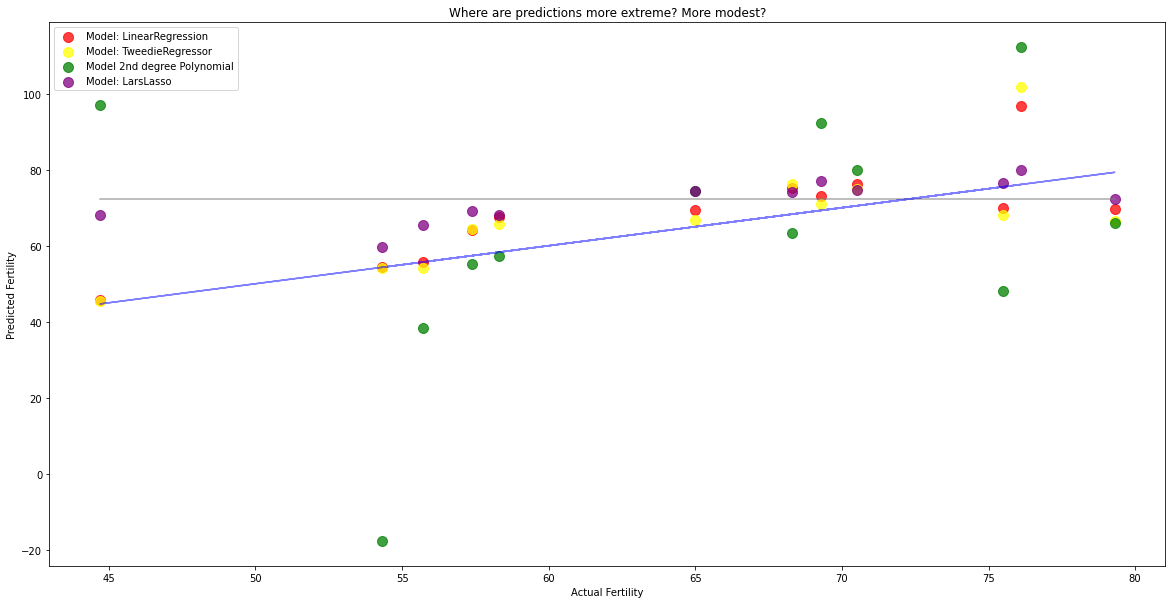

In [15]:
# y_validate.head()
plt.figure(figsize=(20,10))
plt.plot(y_validate.Fertility, y_validate.Fertility_pred_mean, alpha=.5, color="gray", label='_nolegend_')
# plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.Fertility, y_validate.Fertility, alpha=.5, color="blue", label='_nolegend_')
# plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.Fertility, y_validate.Fertility_pred_lm, 
            alpha=.75, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.Fertility, y_validate.Fertility_pred_glm, 
            alpha=.75, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.Fertility, y_validate.Fertility_pred_lm2, 
            alpha=.75, color="green", s=100, label="Model 2nd degree Polynomial")
plt.scatter(y_validate.Fertility, y_validate.Fertility_pred_lars, 
            alpha=.75, color="purple", s=100, label="Model: LarsLasso")
plt.legend()
plt.xlabel("Actual Fertility")
plt.ylabel("Predicted Fertility")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

## Residual Plots: Plotting the Errors in Predictions

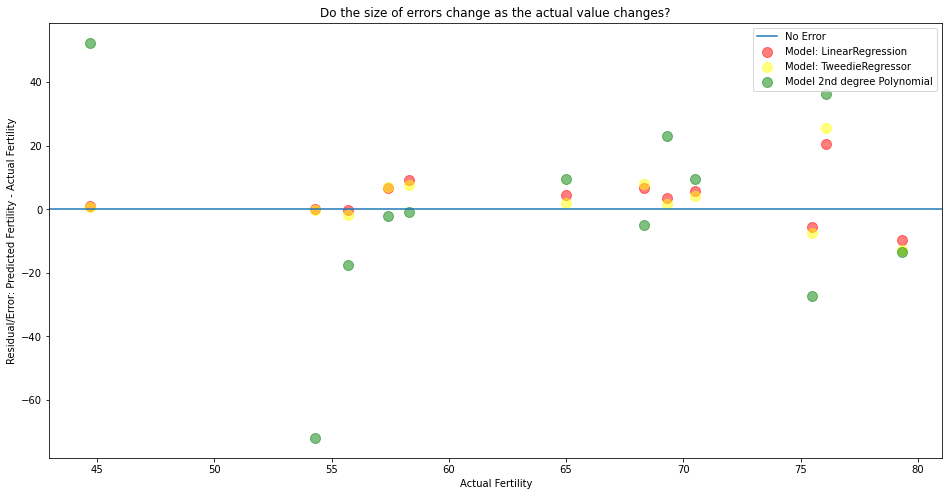

In [16]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.Fertility, y_validate.Fertility_pred_lm-y_validate.Fertility, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.Fertility, y_validate.Fertility_pred_glm-y_validate.Fertility, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.Fertility, y_validate.Fertility_pred_lm2-y_validate.Fertility, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Fertility")
plt.ylabel("Residual/Error: Predicted Fertility - Actual Fertility")
plt.title("Do the size of errors change as the actual value changes?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

## Histograms

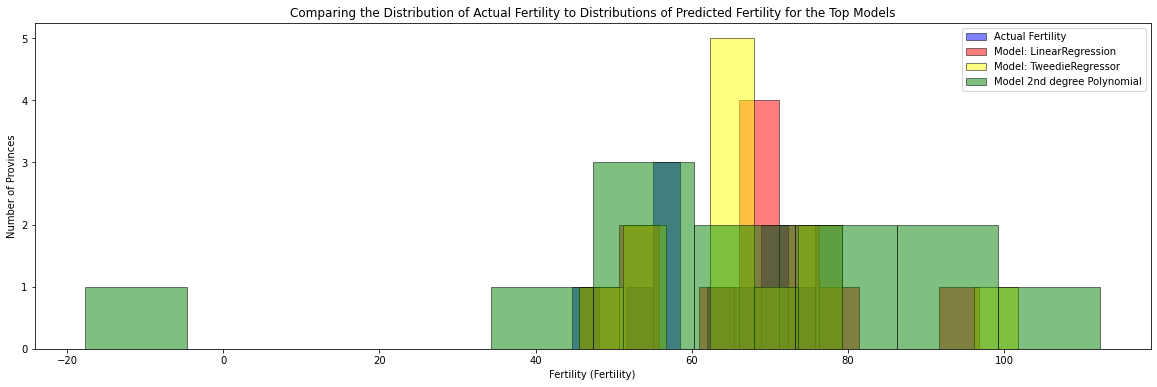

In [17]:
plt.figure(figsize=(20,6))

plt.hist(y_validate.Fertility, color='blue', alpha=.5, label="Actual Fertility", ec='black')
plt.hist(y_validate.Fertility_pred_lm, color='red', alpha=.5, label="Model: LinearRegression", ec='black')
plt.hist(y_validate.Fertility_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor", ec='black')
plt.hist(y_validate.Fertility_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial", ec='black')

plt.xlabel("Fertility (Fertility)")
plt.ylabel("Number of Provinces")
plt.title("Comparing the Distribution of Actual Fertility to Distributions of Predicted Fertility for the Top Models")
plt.legend()
plt.show()

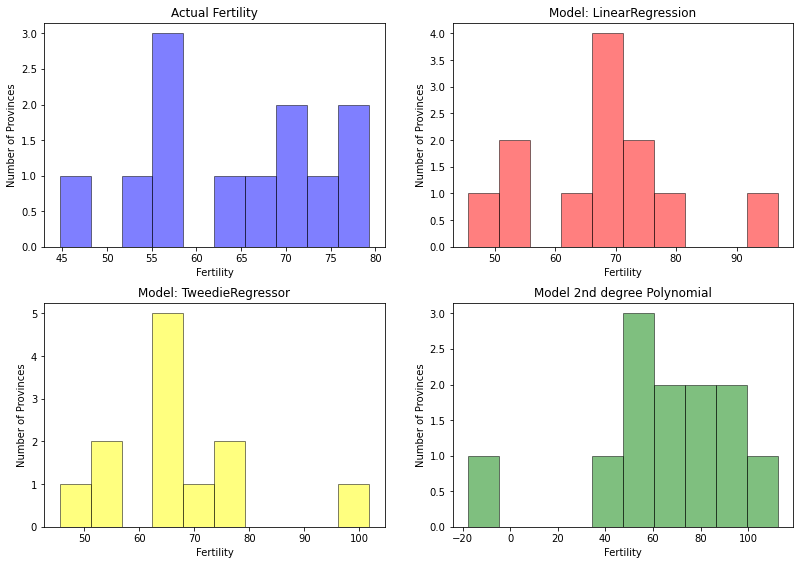

In [18]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1, title="Actual Fertility", xlabel="Fertility", ylabel="Number of Provinces")
plt.hist(y_validate.Fertility, color='blue', alpha=.5, ec='black')

plt.subplot(2,2,2, title="Model: LinearRegression", xlabel="Fertility", ylabel="Number of Provinces")
plt.hist(y_validate.Fertility_pred_lm, color='red', alpha=.5, ec='black')

plt.subplot(2,2,3, title="Model: TweedieRegressor", xlabel="Fertility", ylabel="Number of Provinces")
plt.hist(y_validate.Fertility_pred_glm, color='yellow', alpha=.5, ec='black')

plt.subplot(2,2,4, title="Model 2nd degree Polynomial", xlabel="Fertility", ylabel="Number of Provinces")
plt.hist(y_validate.Fertility_pred_lm2, color='green', alpha=.5, ec='black')

plt.subplots_adjust(top=1, hspace=.25, left=.25)

# plt.title("Comparing the Distribution of Actual Fertility to Distributions of Predicted Fertility for the Top Models")

plt.show()

## Model Selection & Out-of-Sample Evaluation

Model selected: lm (using LinearRegression)

In [19]:
y_test = pd.DataFrame(y_test)

# predict on test
y_test['Fertility_pred_lm'] = lm.predict(X_test)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.Fertility, y_test.Fertility_pred_lm)**1/2

print("RMSE for OLS Model using LinearRegression\nOut-of-Sample Performance: ", rmse_test)

RMSE for OLS Model using LinearRegression
Out-of-Sample Performance:  73.39122481981754
